<a href="https://colab.research.google.com/github/LuisPeMoraRod/AI-Laboratories/blob/kmeans/Lab_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio K Means


*   Mauricio Calderon
*   Luis Pedro Morales






El punto 1 y 2 van adjuntos en el documento de Excel

3. Genere 1000 datos de forma aleatoria en 2 dimensiones y grafíquelos.

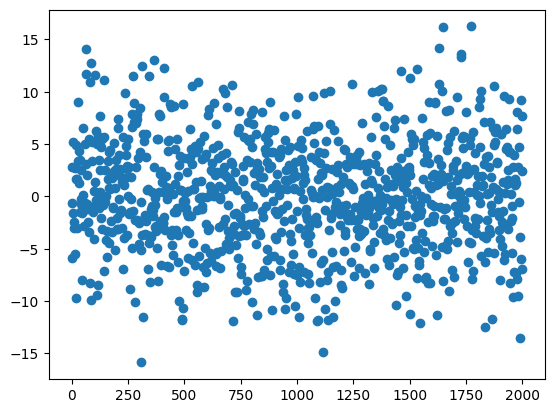

1000
[[0.0, -5.86728993923812], [2.002002002002002, -0.6269605847820116], [4.004004004004004, 2.8134198708436995], [6.0060060060060065, 5.192490983673373], [8.008008008008009, -1.5652677716692125], [10.01001001001001, -2.481775346179897], [12.012012012012013, -3.0140605608139808], [14.014014014014016, 2.753980306010228], [16.016016016016017, -5.542010531784134], [18.01801801801802, -9.718271568109262], [20.02002002002002, 4.947693400372874], [22.022022022022025, 1.635110838296693], [24.024024024024026, 1.627660592844922], [26.026026026026027, -3.0365597271502405], [28.028028028028032, 3.3502598150056366], [30.030030030030034, 8.977556230219202], [32.032032032032035, 4.374868009137629], [34.034034034034036, 1.3202059635444434], [36.03603603603604, 3.466672425768598], [38.03803803803804, -1.5350864007309826], [40.04004004004004, -0.7484694513523193], [42.04204204204205, 2.5014496229742598], [44.04404404404405, -0.28722723490126795], [46.04604604604605, -7.959252282542147], [48.0480480480

In [19]:
import matplotlib.pyplot as plt
import numpy

# Genera los 1000 datos aleatorios
x = numpy.linspace(0, 2000, 1000)  # Genera valores de x equidistantes entre 0 y 10
y = numpy.sin(x) + numpy.random.normal(0, 5, 1000)  # Genera valores de y con ruido
    
dataset = [[x[i], y[i]] for i in range(1000)]

# Grafica los datos en 2 dimensiones
x_values, y_values = zip(*dataset)
plt.plot(x_values, y_values, 'o')
plt.show()




print(len(dataset))
print(dataset)


4. Programe el algoritmo de k-means con el algoritmo visto en clase. El algoritmo debe ser programado por usted. No se permite que utilice métodos ya
programados de librerías



  * 1.   Programación del algoritmo indicando cada una de las iteraciones y de error SSE
  * 2.   Debe indicar si converge o no, en cual iteración converge si lo hace
  * 3.   Graficación de los datos de cada iteración con cada uno de los centroides



Iteración 1:
Centroides:
[[ 6.75675676e+02 -6.11503225e-02]
 [ 1.67667668e+03  4.30270197e-01]]
Error SSE: 144159811.3656658
--------------------


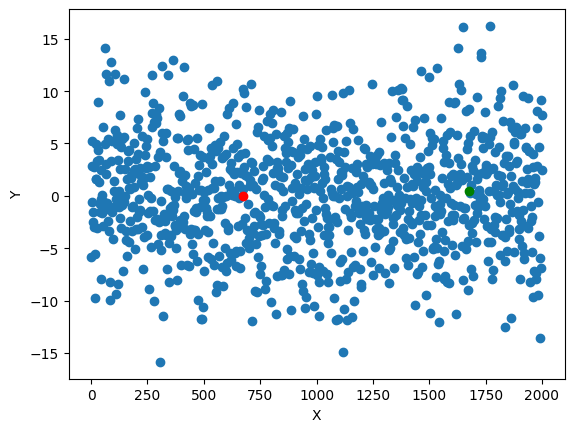

Iteración 2:
Centroides:
[[ 5.87587588e+02 -8.19719475e-03]
 [ 1.58858859e+03  2.49732709e-01]]
Error SSE: 99045639.44923936
--------------------


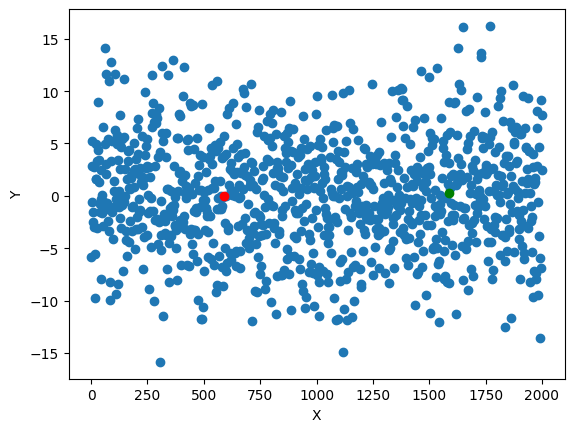

Iteración 3:
Centroides:
[[5.43543544e+02 1.04668014e-01]
 [1.54454454e+03 9.01985224e-02]]
Error SSE: 87406392.07763918
--------------------


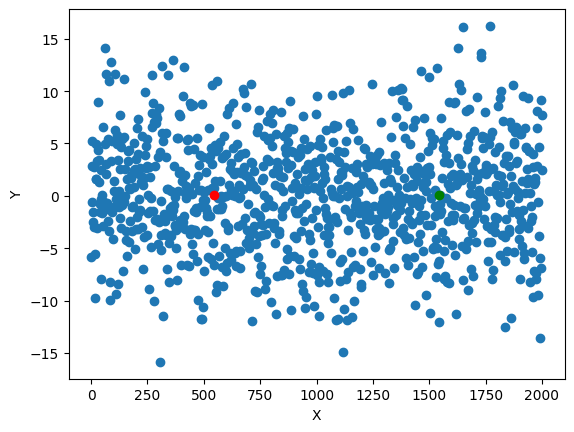

Iteración 4:
Centroides:
[[5.21521522e+02 1.61234465e-01]
 [1.52252252e+03 2.90910775e-02]]
Error SSE: 84496555.96861199
--------------------


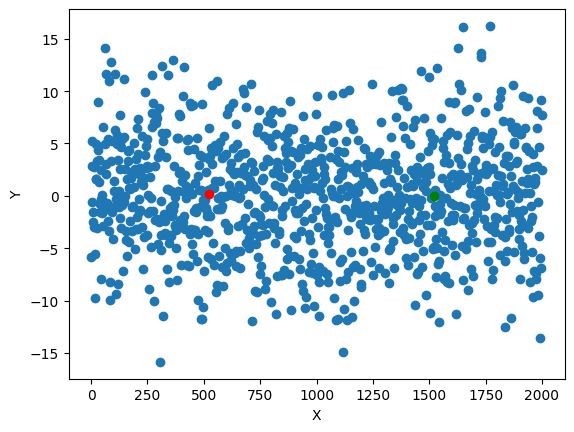

Iteración 5:
Centroides:
[[5.10510511e+02 1.55952625e-01]
 [1.51151151e+03 3.75830963e-02]]
Error SSE: 83769099.23791467
--------------------


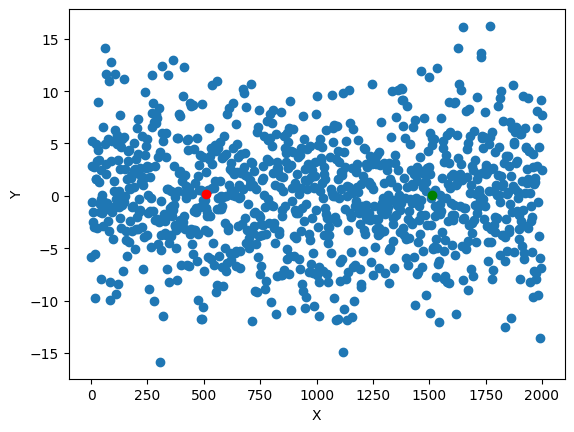

Iteración 6:
Centroides:
[[5.04504505e+02 1.62126208e-01]
 [1.50550551e+03 3.27195766e-02]]
Error SSE: 83587735.99066624
--------------------


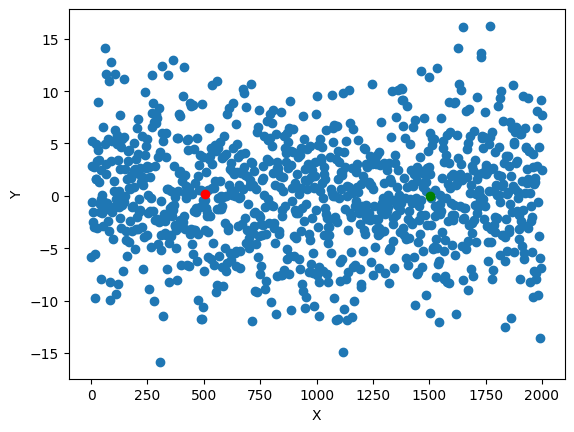

Iteración 7:
Centroides:
[[5.02502503e+02 1.91591214e-01]
 [1.50350350e+03 3.41960779e-03]]
Error SSE: 83539636.01316561
--------------------


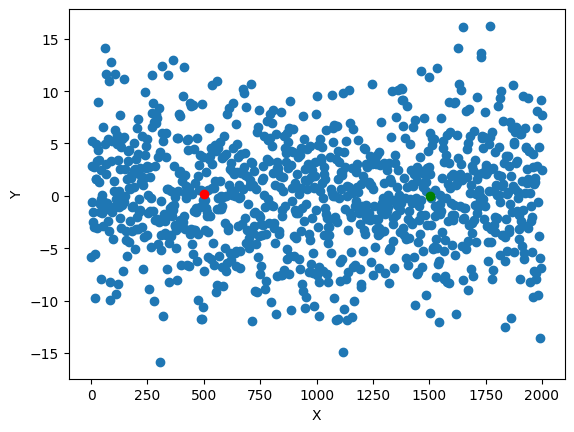

Iteración 8:
Centroides:
[[5.01501502e+02 1.82343843e-01]
 [1.50250250e+03 1.31191094e-02]]
Error SSE: 83531620.90822865
--------------------


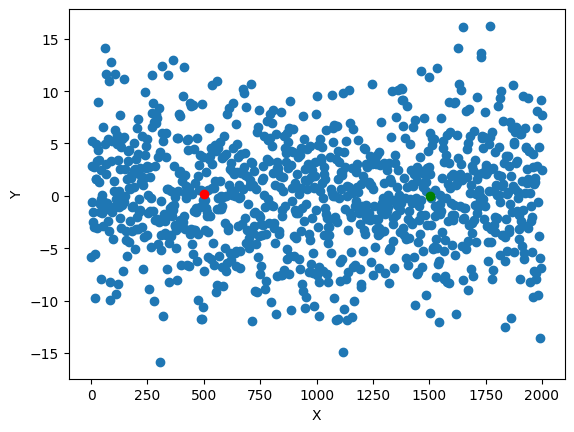

Iteración 9:
Centroides:
[[5.00500501e+02 1.63694895e-01]
 [1.50150150e+03 3.21819308e-02]]
Error SSE: 83528618.0002487
--------------------


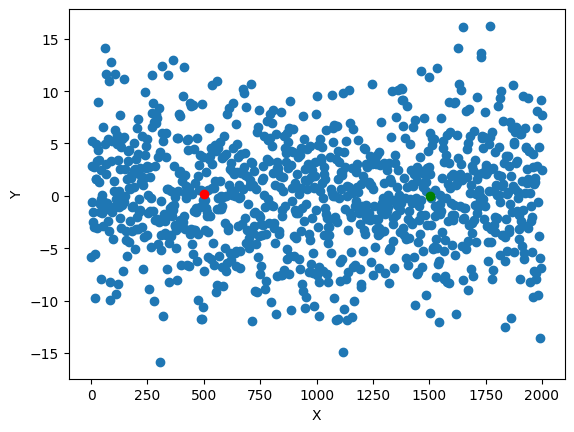

Iteración 10:
Centroides:
[[4.99499499e+02 1.79095696e-01]
 [1.50050050e+03 1.70441556e-02]]
Error SSE: 83527613.63356368
--------------------


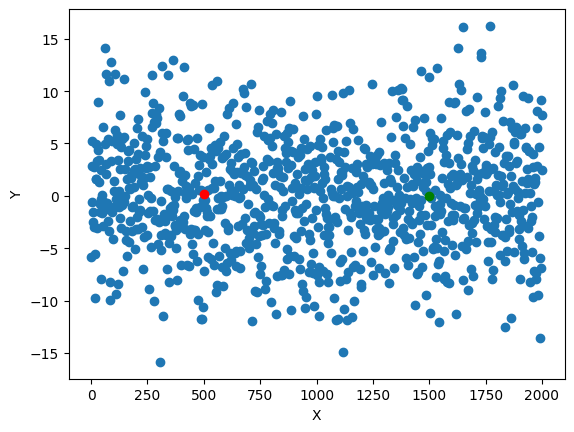

Iteración 11:
Centroides:
[[4.99499499e+02 1.79095696e-01]
 [1.50050050e+03 1.70441556e-02]]
Error SSE: 83526611.39739121
--------------------


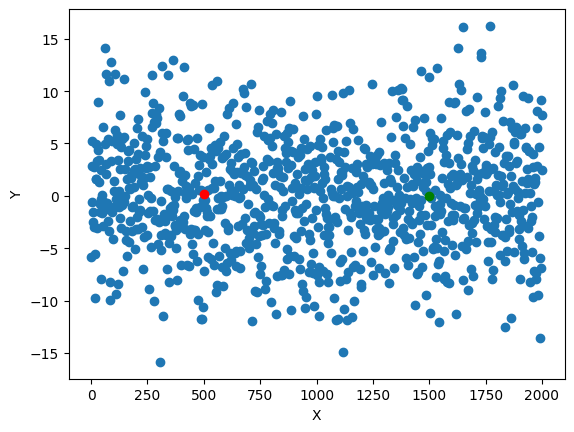

Converge en la iteración 11


In [40]:
import numpy as np

def k_means(data, k, max_iters=100):
    data = np.array(data, dtype=np.float64)  # Convertir a matriz NumPy
    
    # Inicialización de centroides como randoms
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    converged = False
    iteration = 0
    
    while not converged and iteration < max_iters:
        # Asignar puntos al centroide más cercano
        clusters = [[] for _ in range(k)]
        
        for point in data:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        
        # Calcular nuevos centroides
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroid
                                  for centroid, cluster in zip(centroids, clusters)])
        
        # Calcular el error SSE 
        sse = sum(np.linalg.norm(point - centroids[cluster_index])**2
                  for cluster_index, cluster in enumerate(clusters) for point in cluster)
        
        # Comprobar si los centroides convergen
        if np.allclose(centroids, new_centroids):
            converged = True
        
        centroids = new_centroids
        iteration += 1
        
        # Imprimir resultado de la iteración
        print(f"Iteración {iteration}:")
        print("Centroides:")
        print(centroids)
        print("Error SSE:", sse)
        print("-" * 20)

        colors = ['r', 'g', 'b', 'c', 'm', 'y']

        
        x_values, y_values = zip(*dataset)
        plt.plot(x_values, y_values, 'o')


        for i, pair in enumerate(centroids):
          x, y = pair  # Obtener las coordenadas x e y del par ordenado
          
          # Imprimir el punto con un color diferente
          plt.scatter(x, y, color=colors[i % len(colors)], label=f"Point {i+1}",zorder=10)
    
        plt.xlabel('X')  # Etiqueta del eje x
        plt.ylabel('Y')  # Etiqueta del eje y
        plt.show()
    
    if converged:
        print("Converge en la iteración", iteration)
    else:
        print("No llegó a converger")
    
    return centroids, clusters


# Ejemplo de uso
k = 2

centroids, clusters = k_means(dataset, k)

# Conclusiones

1. K-means es un algoritmo de aprendizaje no supervisado que nos permite de una manera sencilla generar agrupaciones de datos. Como pudimos ver en los ejemplos, nosotros podemos facilmente seleccionar la cantidad de conjuntos que queremos que forme(clústers).

2. El algoritmo K-means en este caso esta siendo aplicado con inicialmente con un conjunto de centroides aleatorios pero existen formulas con enfoque heurístico que permiten obtener valores iniciales de centroides mas adaptados según se quiera.

3. Es importante utilizar el  SSE (Suma de los errores al cuadrado), como metrica  en cada iteración para encontrar la configuración óptima de clústeres y poder determinar la que mejorar se ajusta comparando el error entre iteraciones.
